In [3]:
# -----------------------------
# Step 1: Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Optional: For Jupyter inline plots
%matplotlib inline

# Apply seaborn style to plots
sns.set()

Load the Dataset

In [4]:
# -----------------------------
# Step 2: Load Dataset
# -----------------------------
# Replace the path with your actual CSV file path
file_path = r"D:\Personal\KAIM-10 Academy\Week 4\Project\Credit-Risk-Modeling-Week 4\data\raw\raw_data.csv"

df = pd.read_csv(file_path)

print("Dataset loaded successfully!")

Dataset loaded successfully!


Overview of the Dataset

In [5]:
# -----------------------------
# Step 1: Overview of the Data
# -----------------------------

import pandas as pd

# Load dataset
file_path = r"D:\Personal\KAIM-10 Academy\Week 4\Project\Credit-Risk-Modeling-Week 4\data\raw\raw_data.csv"
df = pd.read_csv(file_path)

# Number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Data types of each column
print("\nColumn data types:\n", df.dtypes)

# Display first 5 rows
print("\nFirst 5 rows of the dataset:\n", df.head())

Number of rows: 95662
Number of columns: 16

Column data types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First 5 rows of the dataset:
          TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  Subscr

Data Quality Checks

In [6]:
# -----------------------------
# Step 2: Data Quality Checks
# -----------------------------

# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# 2. Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)

# 3. Check unique values for categorical/object columns
categorical_cols = df.select_dtypes(include='object').columns
print("\nNumber of unique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()}")

# 4. Quick overview for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nBasic stats for numeric columns:")
print(df[numeric_cols].describe())

Missing values per column:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

Number of duplicate rows: 0

Number of unique values in categorical columns:
TransactionId: 95662
BatchId: 94809
AccountId: 3633
SubscriptionId: 3627
CustomerId: 3742
CurrencyCode: 1
ProviderId: 6
ProductId: 23
ProductCategory: 9
ChannelId: 4
TransactionStartTime: 94556

Basic stats for numeric columns:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std

Summary Statistics

In [7]:
# 1. Describe numeric columns
numeric_summary = df.describe()
print("Summary statistics for numeric columns:\n", numeric_summary)

# 2. Median (50th percentile)
numeric_median = df.median(numeric_only=True)
print("\nMedian values:\n", numeric_median)

# 3. Variance
numeric_variance = df.var(numeric_only=True)
print("\nVariance of numeric columns:\n", numeric_variance)

# 4. Skewness (distribution shape)
numeric_skew = df.skew(numeric_only=True)
print("\nSkewness of numeric columns:\n", numeric_skew)

# 5. Kurtosis (peakedness of distribution)
numeric_kurtosis = df.kurtosis(numeric_only=True)
print("\nKurtosis of numeric columns:\n", numeric_kurtosis)

Summary statistics for numeric columns:
        CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

Median values:
 CountryCode         256.0
Amount             1000.0
Value              1000.0
PricingStrategy       2.0
FraudResult           0.0
dtype: float64

Variance of numeric columns:
 CountryCode        0.000000e+00
Amount             1.520457e+10


Distribution of Numerical Features

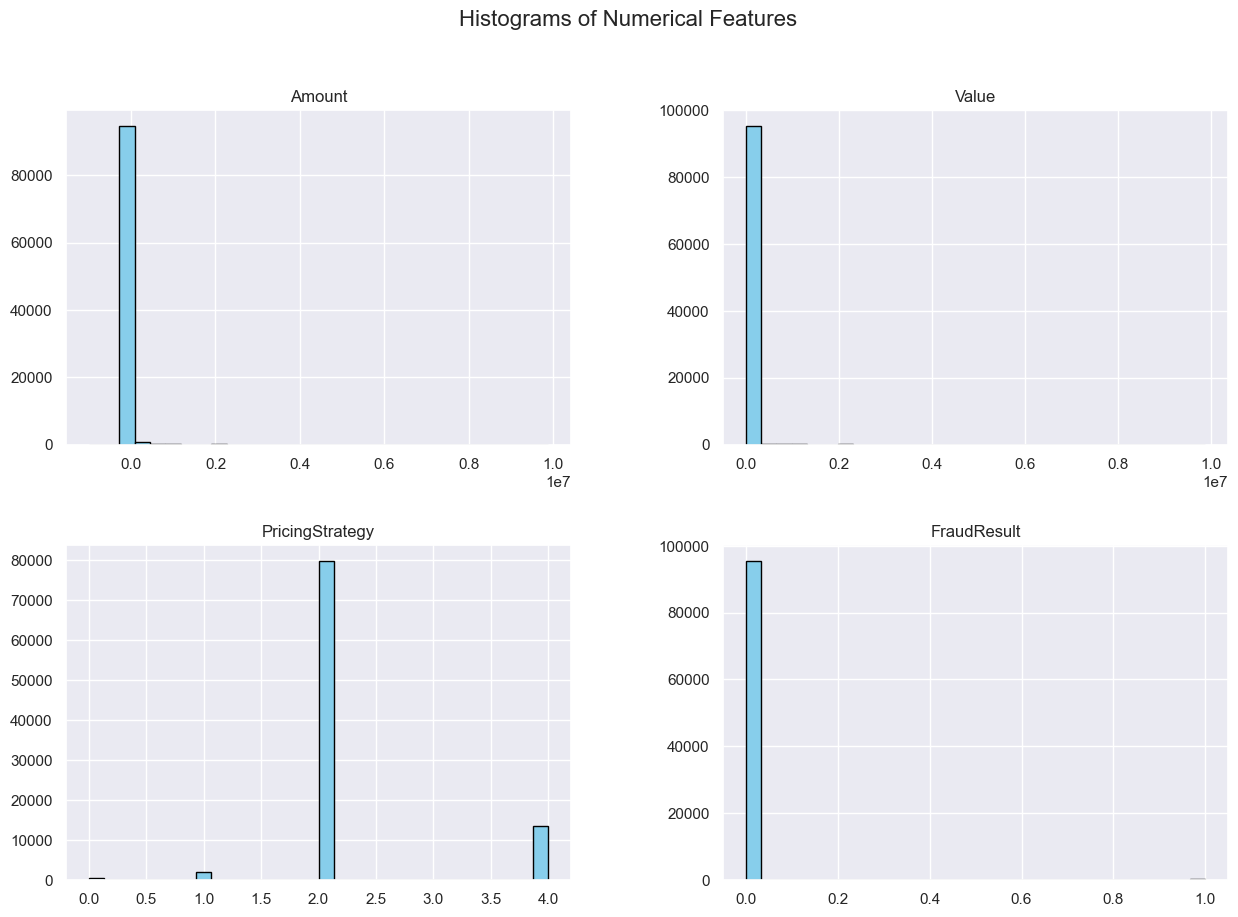

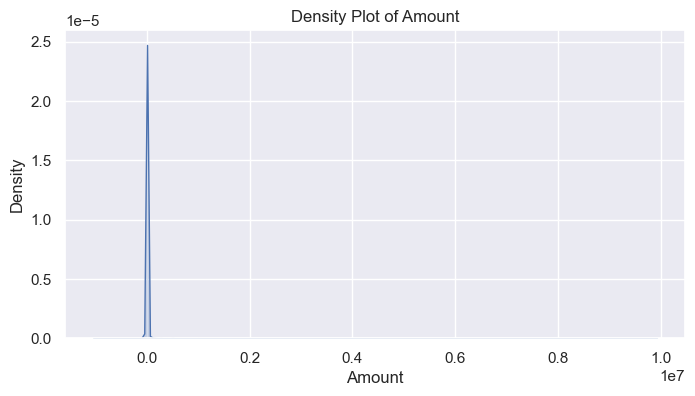

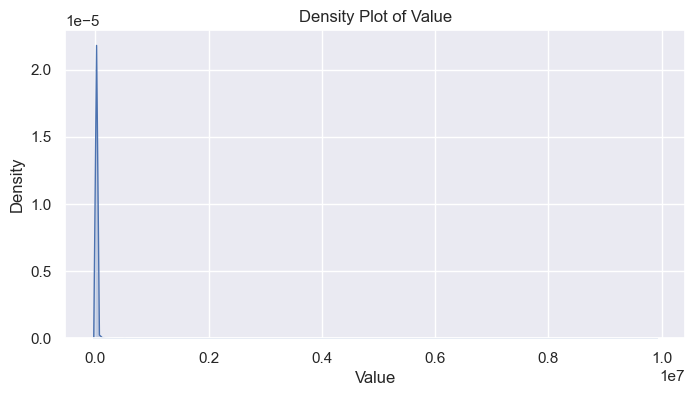

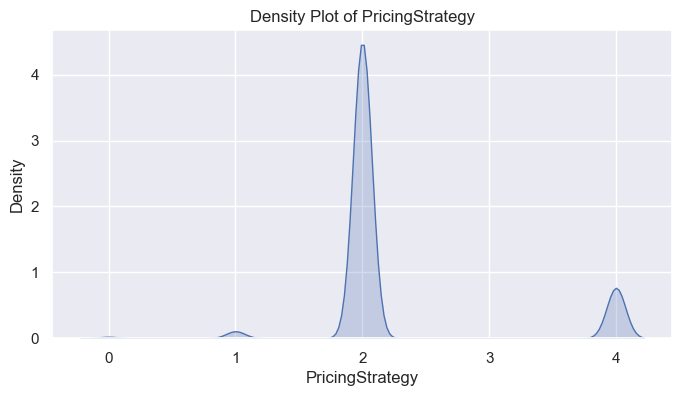

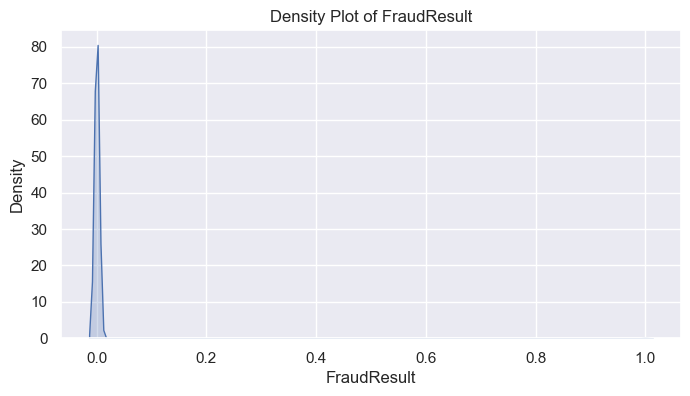

In [9]:
# -----------------------------
# 3. Distribution of Numerical Features
# -----------------------------

# Select numeric columns
numeric_cols = ['Amount', 'Value', 'PricingStrategy', 'FraudResult']  # exclude CountryCode (constant)

# Histograms
df[numeric_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

# Density plots
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Density Plot of {col}')
    plt.show()


Identify categorical columns

In [10]:
categorical_cols = [
    "TransactionId", "BatchId", "AccountId", "SubscriptionId",
    "CustomerId", "CurrencyCode", "ProviderId", "ProductId",
    "ProductCategory", "ChannelId", "TransactionStartTime"
]

Visualize distributions

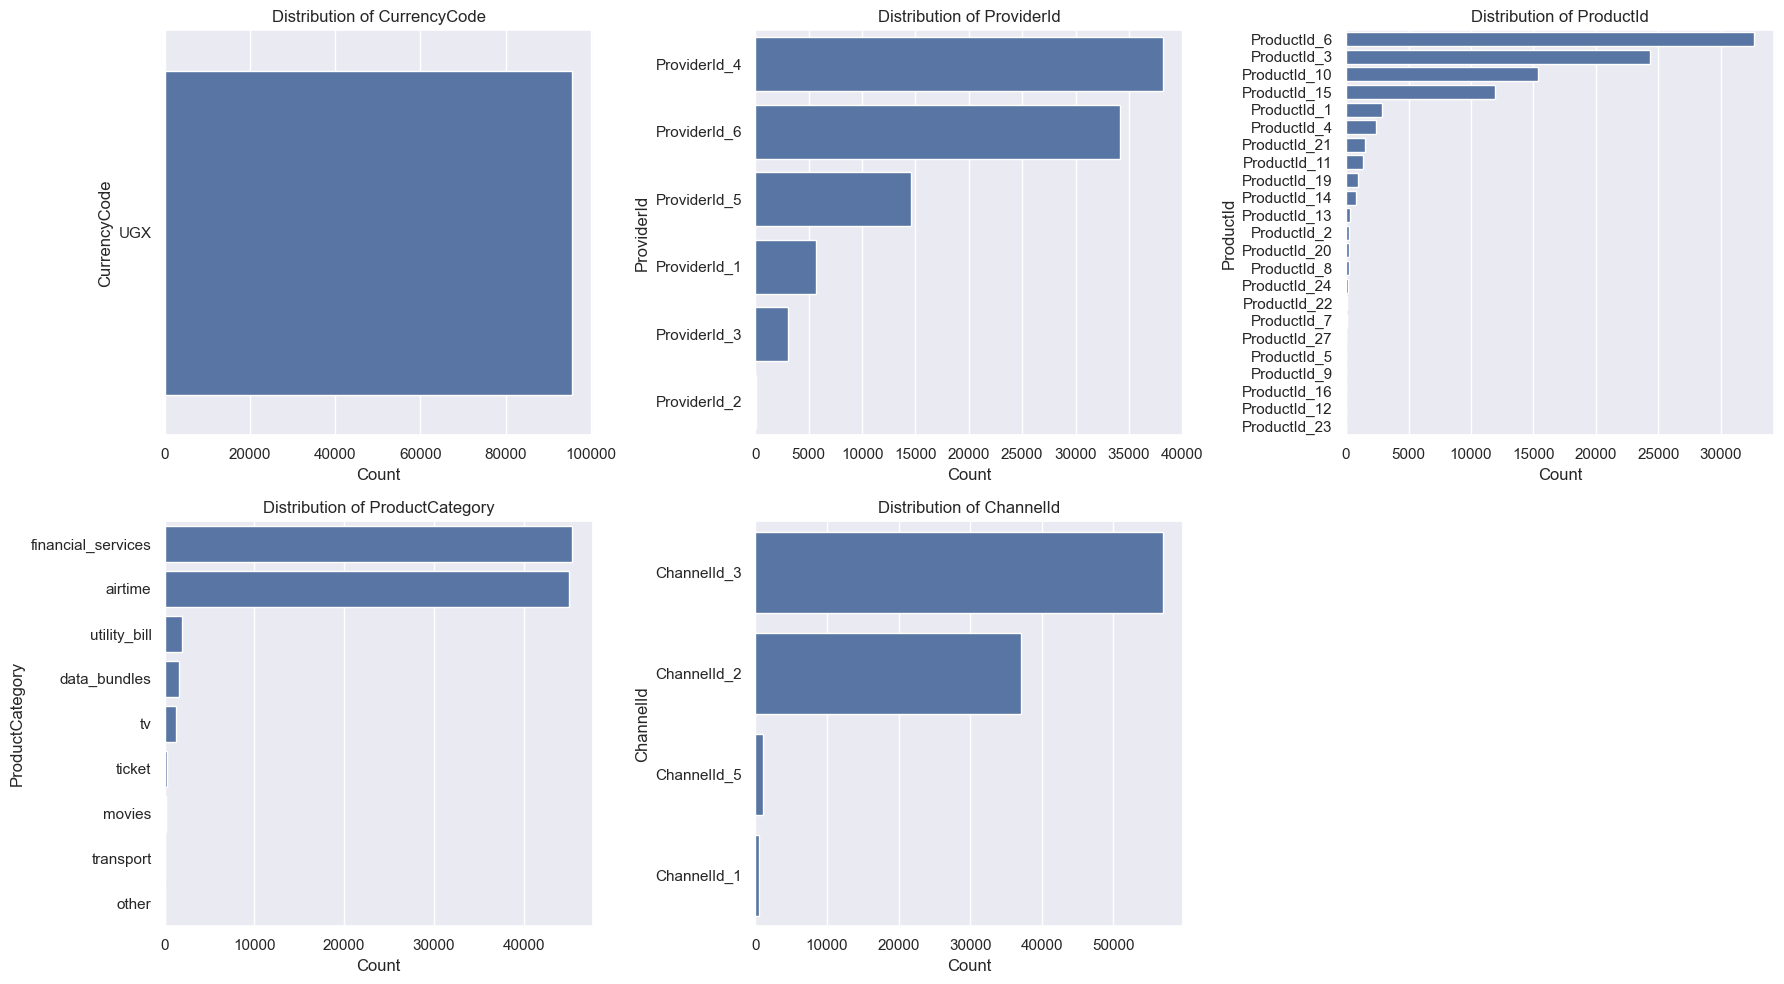

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Meaningful categorical columns (excluding IDs)
meaningful_cat_cols = ["CurrencyCode", "ProviderId", "ProductId", "ProductCategory", "ChannelId"]

plt.figure(figsize=(18, 10))
for i, col in enumerate(meaningful_cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Correlation Analysis

In [12]:
numeric_cols = ["CountryCode", "Amount", "Value", "PricingStrategy", "FraudResult"]

In [13]:
# Correlation matrix
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

                 CountryCode    Amount     Value  PricingStrategy  FraudResult
CountryCode              NaN       NaN       NaN              NaN          NaN
Amount                   NaN  1.000000  0.989692        -0.061931     0.557370
Value                    NaN  0.989692  1.000000        -0.017020     0.566739
PricingStrategy          NaN -0.061931 -0.017020         1.000000    -0.033821
FraudResult              NaN  0.557370  0.566739        -0.033821     1.000000


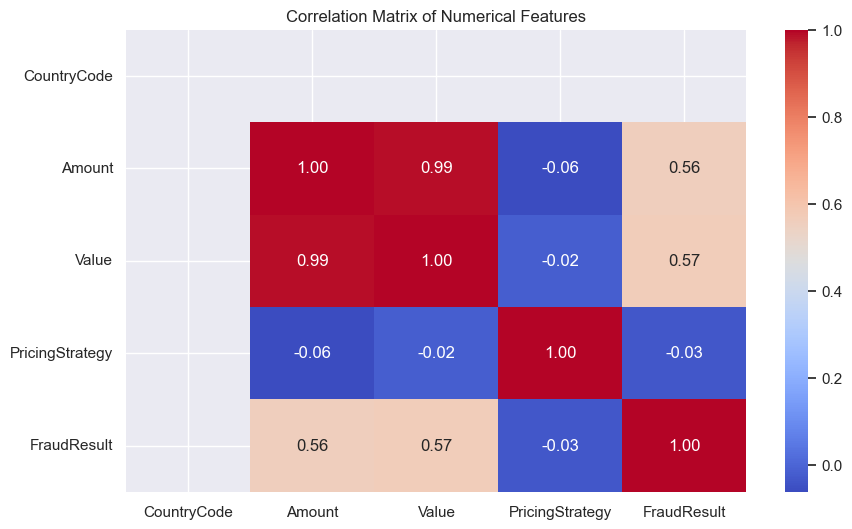

In [14]:
#visualise the correlation
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


Identifying Missing Values

Missing values per column:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

Percentage of missing values per column:
 TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0.0
CountryCode             0.0
ProviderId              0.0
ProductId               0.0
ProductCategory         0.0
ChannelId               0.0
Amount                  0.0
Value                   0.0
TransactionStartTime    0.0
PricingStrategy         0.0
FraudResult             0.0
dtype: float64


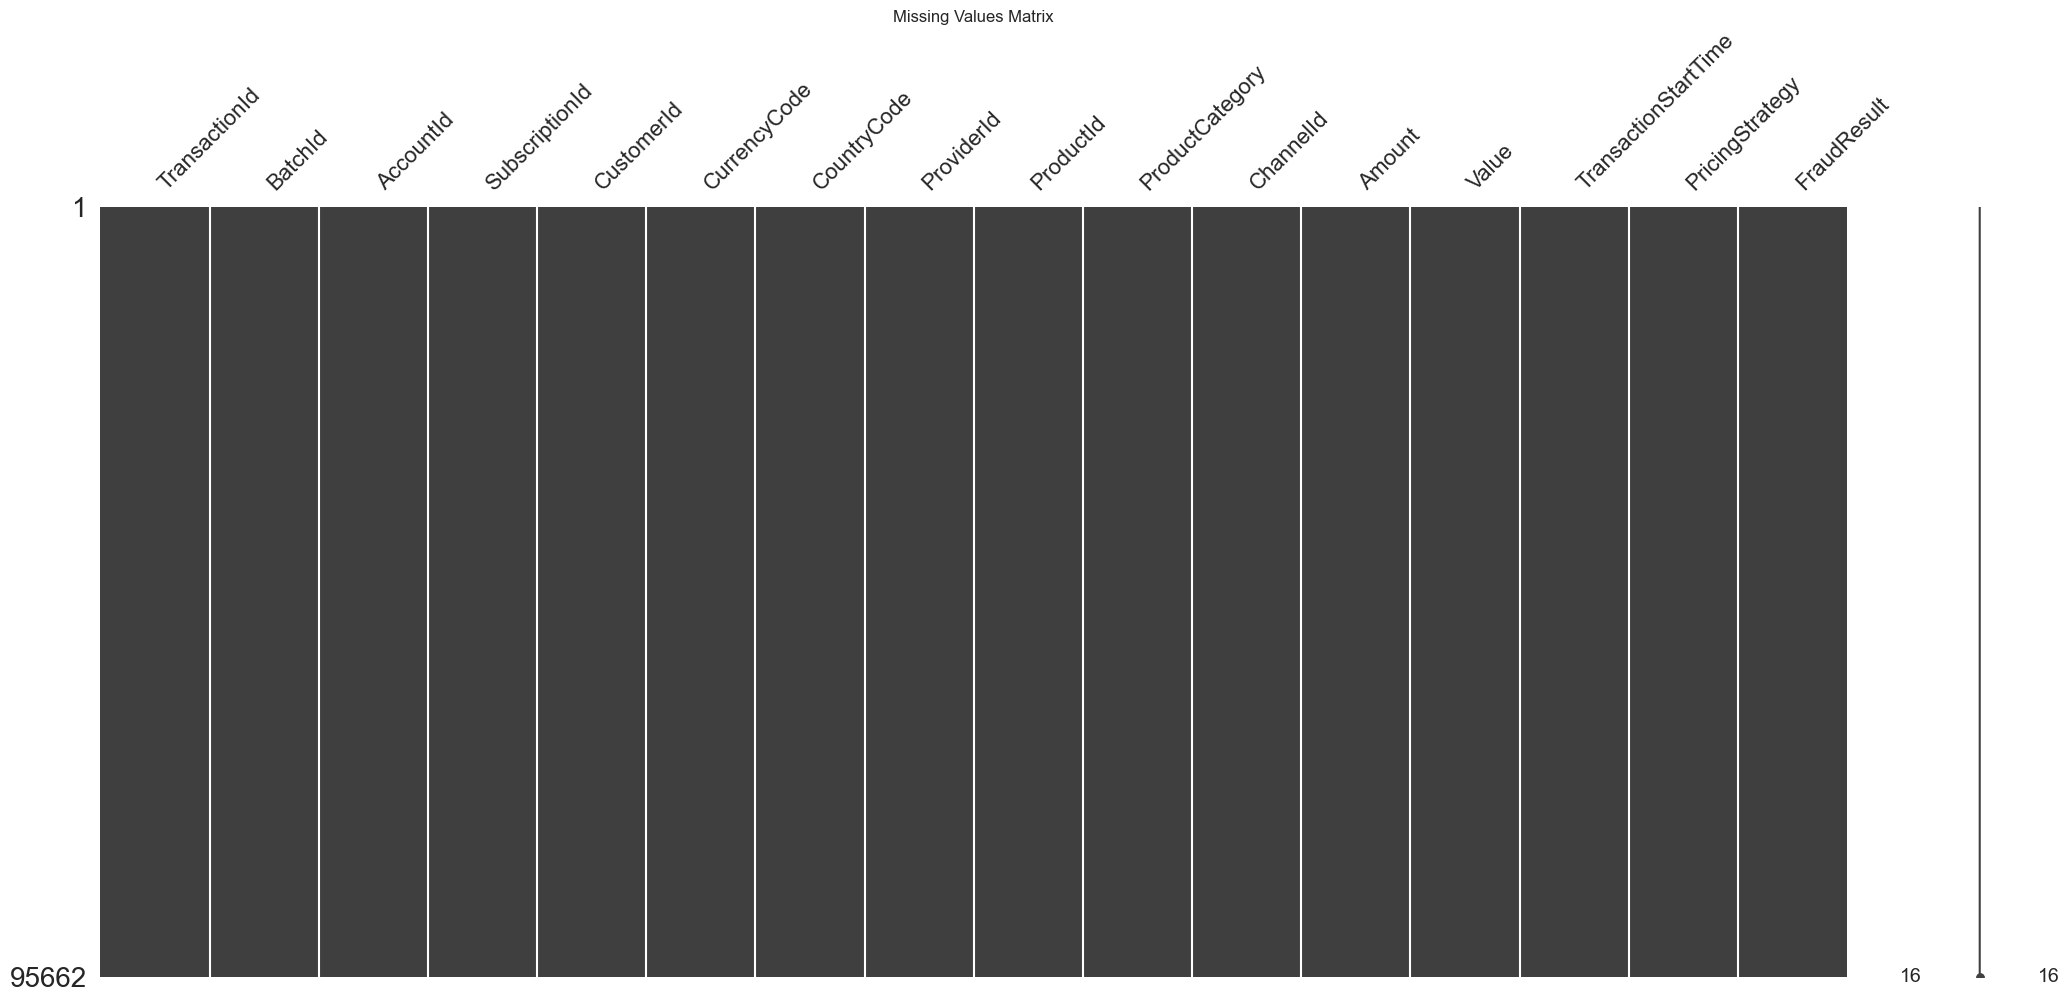

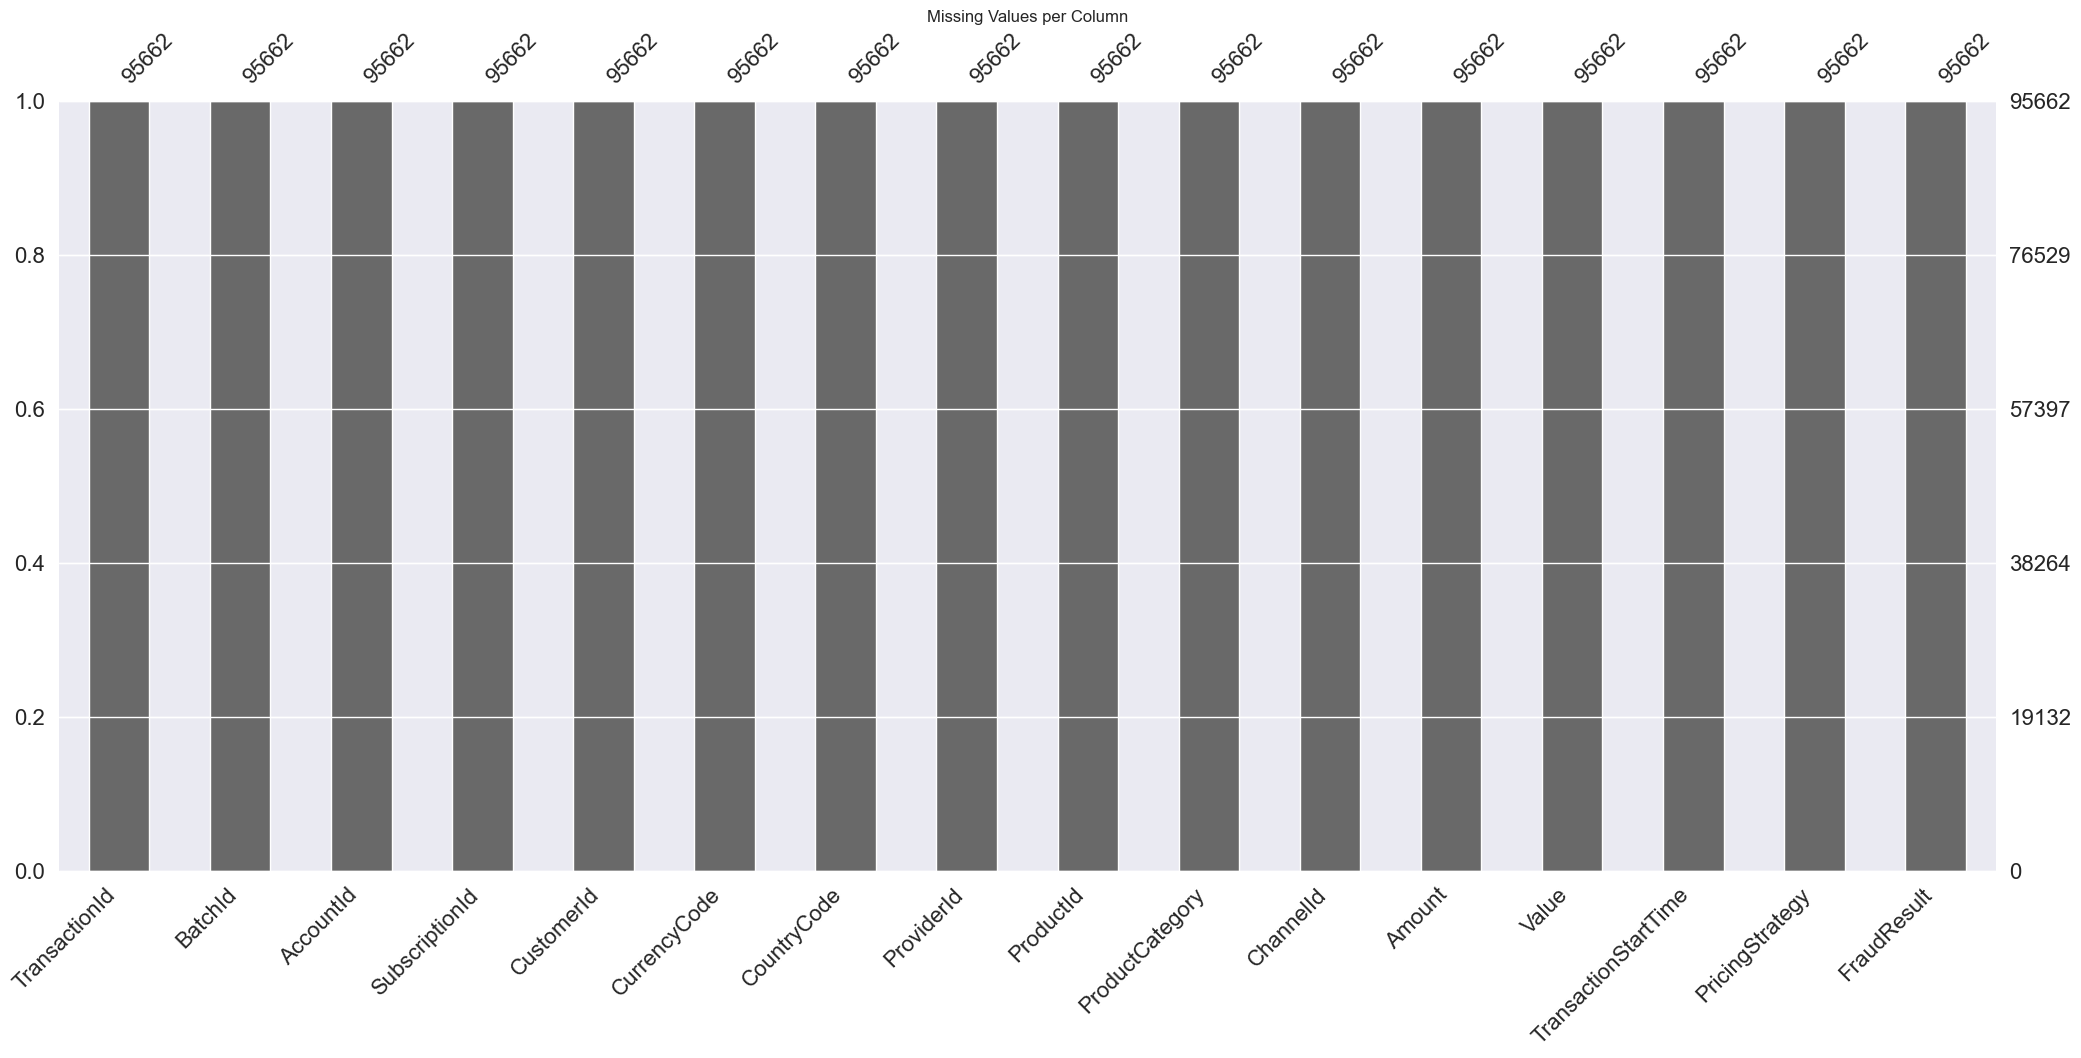

In [15]:
# Check total missing values per column
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

# Percentage of missing values per column
missing_percent = (missing_counts / len(df)) * 100
print("\nPercentage of missing values per column:\n", missing_percent)

# Visualize missing values using missingno
import missingno as msno

# Matrix plot
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()

# Bar plot
msno.bar(df)
plt.title("Missing Values per Column")
plt.show()

Outlier Detection

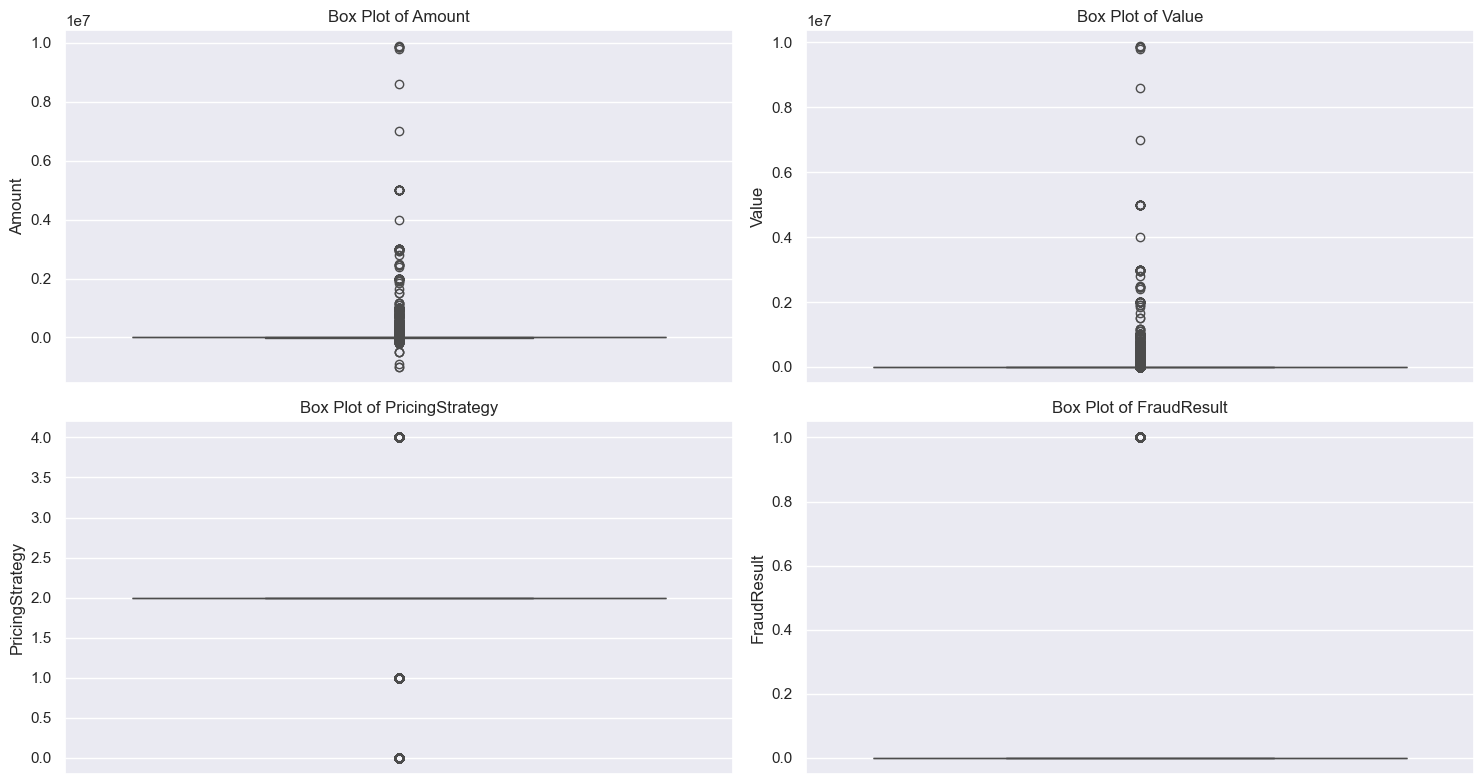

In [16]:
# Select numerical columns
numeric_cols = ['Amount', 'Value', 'PricingStrategy', 'FraudResult']

# Box plots
plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()